In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

import missingno as msgn 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Load dataset 

In [193]:
data = pd.read_csv('data-04/fraudTrain.csv')

In [131]:
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [133]:
def visualise_features(data):
    cols = list(data.columns)
    for col in cols:
        print(f"col name: {col}\nuniques: {data[col].loc[-100:].unique()}\nnumber  of uniques{data[col].loc[-100:].nunique()}\ntype: {type(data[col][0])}")
        print(150 * '-')

In [134]:
visualise_features(data)

col name: Unnamed: 0
uniques: [      0       1       2 ... 1296672 1296673 1296674]
number  of uniques1296675
type: <class 'numpy.int64'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: trans_date_trans_time
uniques: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']
number  of uniques1274791
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: cc_num
uniques: [   2703186189652095        630423337322      38859492057661
    3534093764340240     375534208663984    4767265376804500
      30074693890476    6011360759745864    4922710831011201
    2720830304681674       4642894980163     377234009633447
     180042946491150    5559857416065248    3514865930894695
   

<Axes: >

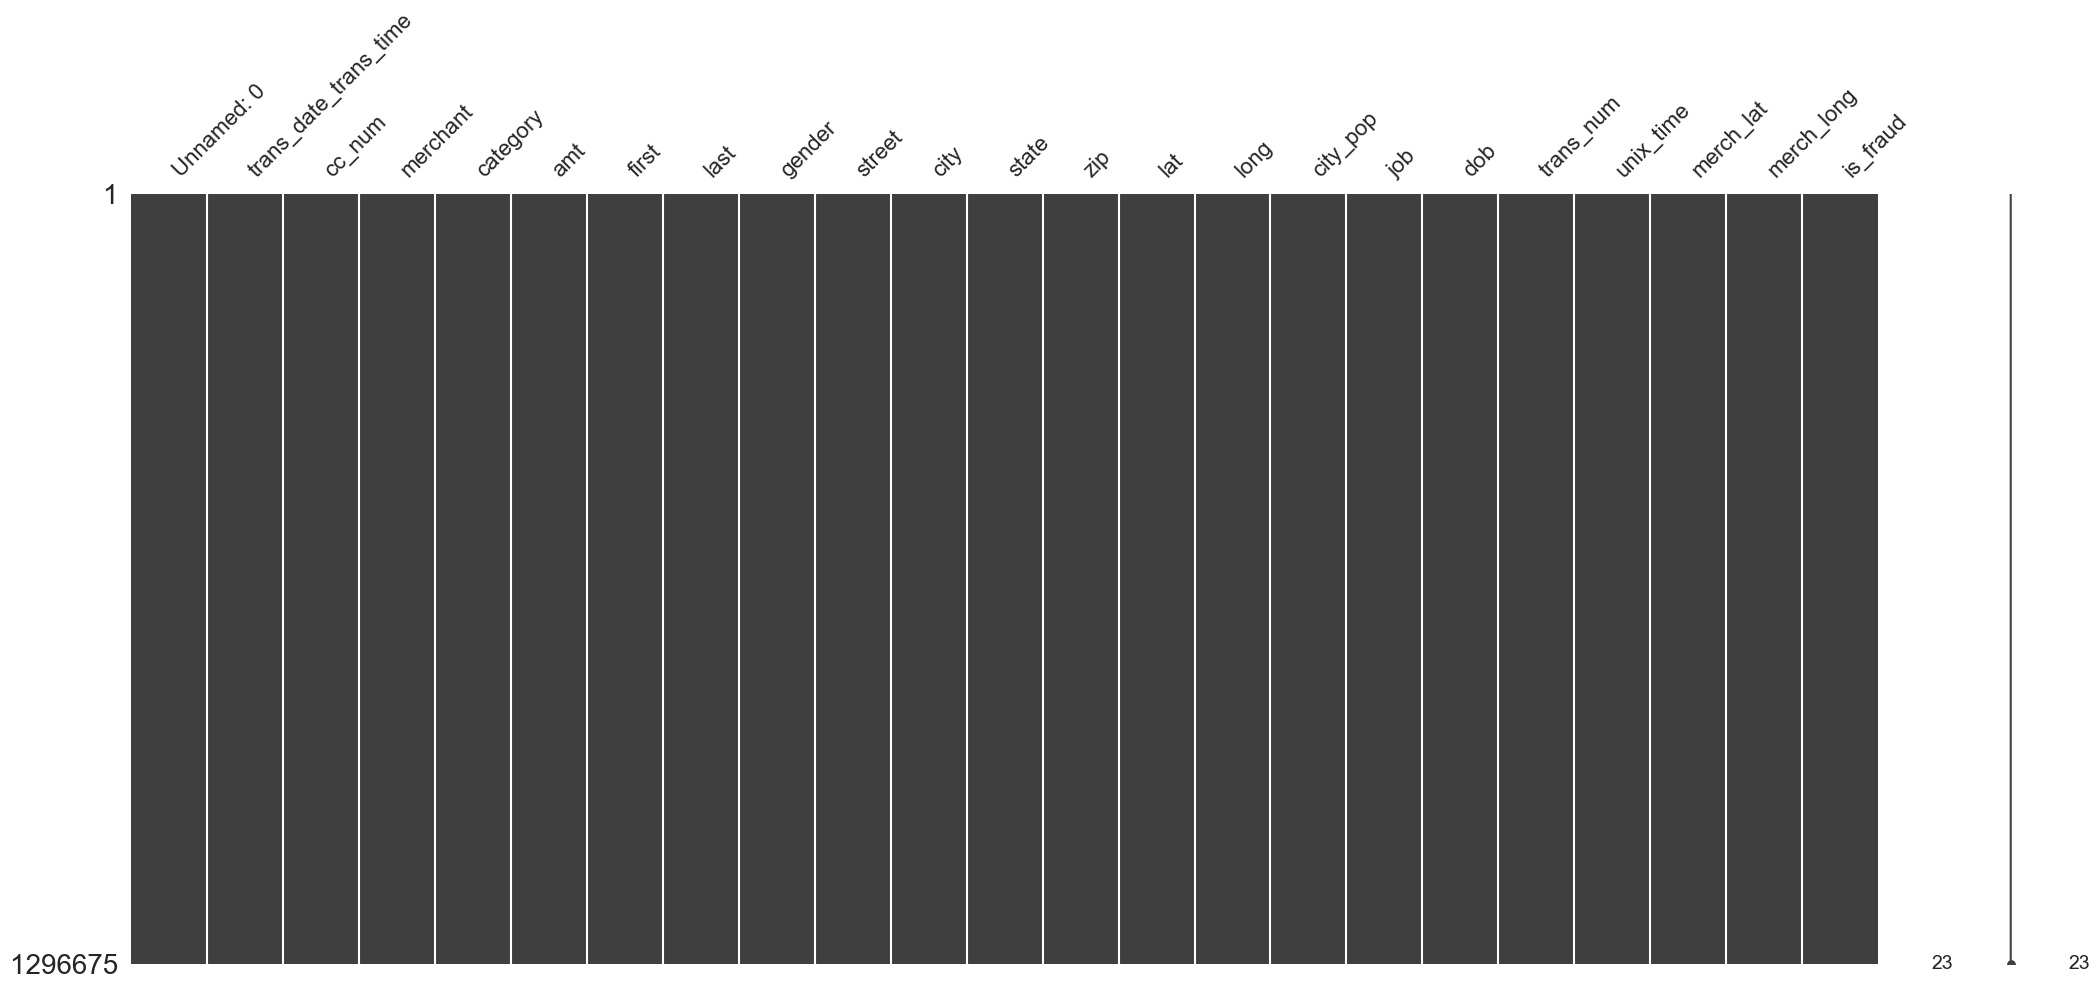

In [135]:
msgn.matrix(data)

# Lets train models with raw data first!

In [306]:
class MyClassifier:
    def __init__(self):
        self.logistic_regression = LogisticRegression()
        self.svm_classifier = SVC()
        self.knn_classifier = KNeighborsClassifier()
        self.decision_tree_classifier = DecisionTreeClassifier()
        self.random_forest_classifier = RandomForestClassifier()
        self.naive_bayes_classifier = GaussianNB()

    def train_logistic_regression(self, X_train, y_train):
        return self.logistic_regression.fit(X_train, y_train)

    def train_svm(self, X_train, y_train):
        return self.svm_classifier.fit(X_train, y_train)

    def train_knn(self, X_train, y_train, n_neighbors=5):
        self.knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
        return self.knn_classifier.fit(X_train, y_train)

    def train_decision_tree(self, X_train, y_train):
        return self.decision_tree_classifier.fit(X_train, y_train)

    def train_random_forest(self, X_train, y_train, n_estimators=100):
        self.random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42, criterion='log_loss')
        return self.random_forest_classifier.fit(X_train, y_train)

    def train_naive_bayes(self, X_train, y_train):
        return self.naive_bayes_classifier.fit(X_train, y_train)

    def predict_logistic_regression(self, X_test):
        return self.logistic_regression.predict(X_test)

    def predict_svm(self, X_test):
        return self.svm_classifier.predict(X_test)

    def predict_knn(self, X_test):
        return self.knn_classifier.predict(X_test)

    def predict_decision_tree(self, X_test):
        return self.decision_tree_classifier.predict(X_test)

    def predict_random_forest(self, X_test):
        return self.random_forest_classifier.predict(X_test)

    def predict_naive_bayes(self, X_test):
        return self.naive_bayes_classifier.predict(X_test)


    def calculate_precision(self, y_true, y_pred):
        return precision_score(y_true, y_pred, average='binary', pos_label=0)

    def calculate_recall(self, y_true, y_pred):
        return recall_score(y_true, y_pred, average='binary', pos_label=0)

    def calculate_f1_score(self, y_true, y_pred):
        return f1_score(y_true, y_pred, pos_label=0, average='binary')

    def calculate_confusion_matrix(self, y_true, y_pred):
        return confusion_matrix(y_true, y_pred)

    def calculate_auc_curve(self, X_test, y_true, model_name):
        if model_name == 'Logistic Regression':
            y_scores = self.logistic_regression.predict_proba(X_test)[:, 1]
        elif model_name == 'SVM':
            y_scores = self.svm_classifier.decision_function(X_test)
        elif model_name == 'KNN':
            y_scores = self.knn_classifier.predict_proba(X_test)[:, 1]
        elif model_name == 'Decision Tree':
            y_scores = self.decision_tree_classifier.predict_proba(X_test)[:, 1]
        elif model_name == 'Random Forest':
            y_scores = self.random_forest_classifier.predict_proba(X_test)[:, 1]
        elif model_name == 'Naive Bayes':
            y_scores = self.naive_bayes_classifier.predict_proba(X_test)[:, 1]
        else:
            raise ValueError(f"Unknown model: {model_name}")

        auc_score = roc_auc_score(y_true, y_scores)

        # Plot ROC curve
        fpr, tpr, thresholds = roc_curve(y_true, y_scores)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend()
        plt.show()

        return auc_score

In [137]:
X = data.select_dtypes(np.number).drop(columns=['is_fraud'])
y = data['is_fraud']

In [335]:
def plot_confusion(cm, model_name):
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## prepare train and test data. 

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
clf = MyClassifier()

In [141]:
from joblib import Parallel, delayed
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [142]:
# Example usage:
# Assuming X_train, y_train, X_test are your training and testing data
with tqdm(total=10, desc="Training Logistic Regression") as pbar:
    models_lr = Parallel(n_jobs=-1)(delayed(clf.train_logistic_regression)(X_subset, y_subset) for X_subset, y_subset in zip(np.array_split(X_train, 10), np.array_split(y_train, 10)))
    predictions_lr = np.hstack(np.mean([model.predict(X_test) for model in models_lr], axis= 0))
    pbar.update(10)

Training Logistic Regression:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
Training Logistic Regression: 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


In [143]:
with tqdm(total=10, desc="Training SVM") as pbar:
    models_sv = Parallel(n_jobs=-1)(delayed(clf.train_svm)(X_subset, y_subset) for X_subset, y_subset in zip(np.array_split(X_train, 10), np.array_split(y_train, 10)))
    predictions_sv = np.mean([model.predict(X_test) for model in models_sv], axis=0)
    pbar.update(10)

Training SVM:   0%|          | 0/10 [00:00<?, ?it/s]C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
Training SVM: 100%|██████████| 10/10 [04:43<00:00, 28.40s/it]


In [144]:
with tqdm(total=10, desc="Training KNN") as pbar:
    models_knn = Parallel(n_jobs=-1)(delayed(clf.train_knn)(X_subset, y_subset) for X_subset, y_subset in zip(np.array_split(X_train, 10), np.array_split(y_train, 10)))
    predictions_knn = np.hstack(np.mean([model.predict(X_test) for model in models_knn], axis=0))
    pbar.update(10)

Training KNN:   0%|          | 0/10 [00:00<?, ?it/s]C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
Training KNN: 100%|██████████| 10/10 [01:02<00:00,  6.29s/it]


In [145]:
with tqdm(total=10, desc="Training decision tree") as pbar:
    models_dt = Parallel(n_jobs=-1)(delayed(clf.train_decision_tree)(X_subset, y_subset) for X_subset, y_subset in zip(np.array_split(X_train, 10), np.array_split(y_train, 10)))
    predictions_dt = np.mean([model.predict(X_test) for model in models_dt], axis=0)
    pbar.update(10)

Training decision tree:   0%|          | 0/10 [00:00<?, ?it/s]C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
Training decision tree: 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]


In [146]:
with tqdm(total=10, desc="Training random forrest") as pbar:
    models_rf = Parallel(n_jobs=-1)(delayed(clf.train_random_forest)(X_subset, y_subset) for X_subset, y_subset in zip(np.array_split(X_train, 10), np.array_split(y_train, 10)))
    predictions_rf = np.mean([model.predict(X_test) for model in models_rf], axis=0)
    pbar.update(10)

Training random forrest:   0%|          | 0/10 [00:00<?, ?it/s]C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
Training random forrest: 100%|██████████| 10/10 [01:35<00:00,  9.50s/it]


In [147]:
with tqdm(total=10, desc="Training naive bayes") as pbar:
    models_nv = Parallel(n_jobs=-1)(delayed(clf.train_naive_bayes)(X_subset, y_subset) for X_subset, y_subset in zip(np.array_split(X_train, 10), np.array_split(y_train, 10)))
    predictions_nv = np.mean([model.predict(X_test) for model in models_nv], axis=0)
    pbar.update(10)

Training naive bayes:   0%|          | 0/10 [00:00<?, ?it/s]C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
Training naive bayes: 100%|██████████| 10/10 [00:01<00:00,  7.45it/s]


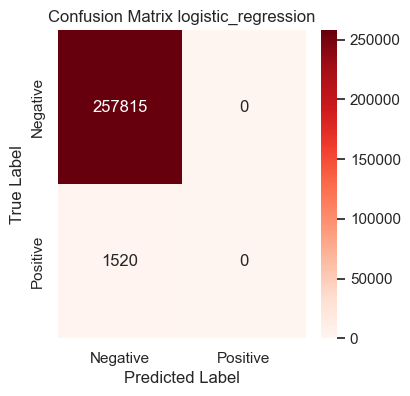

In [150]:
cm_lr = clf.calculate_confusion_matrix(y_test, predictions_lr)
plot_confusion(cm_lr, 'logistic_regression')

In [151]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: U

In [ ]:
# auc_score_lr = clf.calculate_auc_curve(X_test, y_test, 'Logistic Regression')

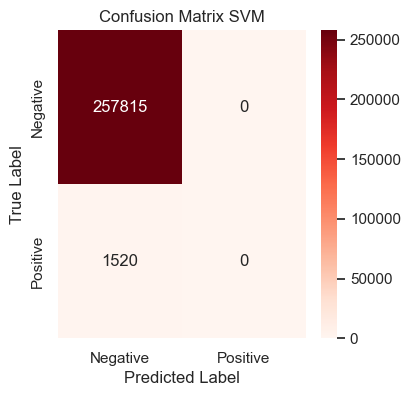

In [152]:
cm_sv = clf.calculate_confusion_matrix(y_test, predictions_sv)
plot_confusion(cm_sv, 'SVM')

In [153]:
print(classification_report(y_test, predictions_sv))

C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
threshold = 0.4
predictions_knn_temp = (predictions_knn > threshold).astype(int)

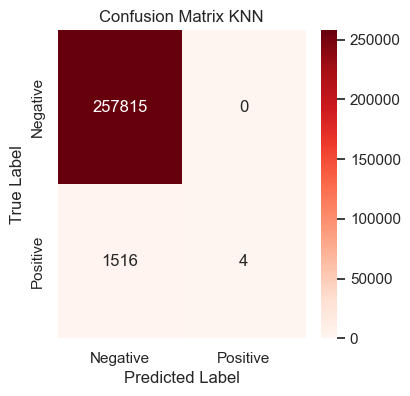

In [155]:
cm_knn = clf.calculate_confusion_matrix(y_test, predictions_knn_temp)
plot_confusion(cm_knn, 'KNN')

In [156]:
print(classification_report(y_test, predictions_knn_temp))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       1.00      0.00      0.01      1520

    accuracy                           0.99    259335
   macro avg       1.00      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



In [ ]:
# clf.calculate_auc_curve(X_test, y_test, model_name ='KNN')

In [157]:
clf2 = MyClassifier()

In [158]:
model_dt = clf2.train_decision_tree(X_train, y_train)
predictions_dt_noj = clf2.predict_decision_tree(X_test)

In [159]:
print(classification_report(y_test, predictions_dt_noj))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.43      0.46      0.44      1520

    accuracy                           0.99    259335
   macro avg       0.71      0.73      0.72    259335
weighted avg       0.99      0.99      0.99    259335



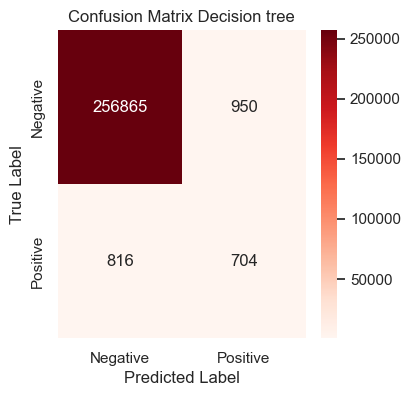

In [160]:
cm_dt = clf.calculate_confusion_matrix(y_test, predictions_dt_noj)
plot_confusion(cm_dt, 'Decision tree')

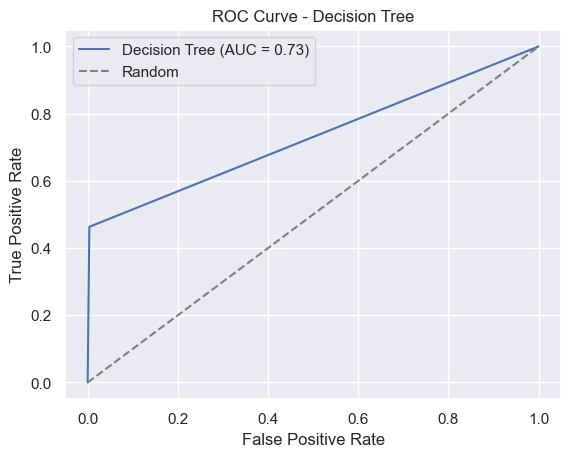

0.7297365409917557

In [161]:
clf2.calculate_auc_curve(X_test, y_test, 'Decision Tree')

## random forest

In [162]:
threshold = 0.5
predictions_rf_temp = (predictions_rf > threshold).astype(int)

In [163]:
print(classification_report(y_test, predictions_rf_temp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.71      0.21      0.33      1520

    accuracy                           0.99    259335
   macro avg       0.85      0.61      0.66    259335
weighted avg       0.99      0.99      0.99    259335



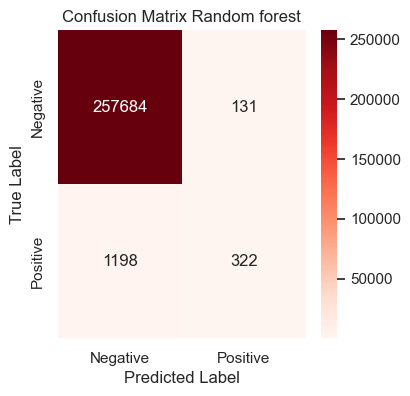

In [164]:
cm_rf = clf.calculate_confusion_matrix(y_test, predictions_rf_temp)
plot_confusion(cm_rf, 'Random forest')

## Naive bayes

In [165]:
model_nv = clf2.train_naive_bayes(X_train, y_train)
predictions_nv_noj = clf2.predict_naive_bayes(X_test)

In [166]:
print(classification_report(y_test, predictions_nv_noj))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: U

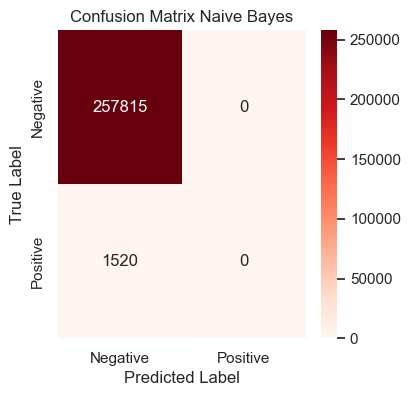

In [167]:
cm_nv = clf2.calculate_confusion_matrix(y_test, predictions_nv_noj)
plot_confusion(cm_nv, 'Naive Bayes')

# let start with features

In [194]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [195]:
data.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 
                   'zip', 'trans_num', 'unix_time', 'merchant', 'city_pop'], axis=1, inplace=True)
data.columns

Index(['category', 'amt', 'gender', 'state', 'lat', 'long', 'job', 'dob',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [196]:
print('Genuine:', round(data['is_fraud'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds:', round(data['is_fraud'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


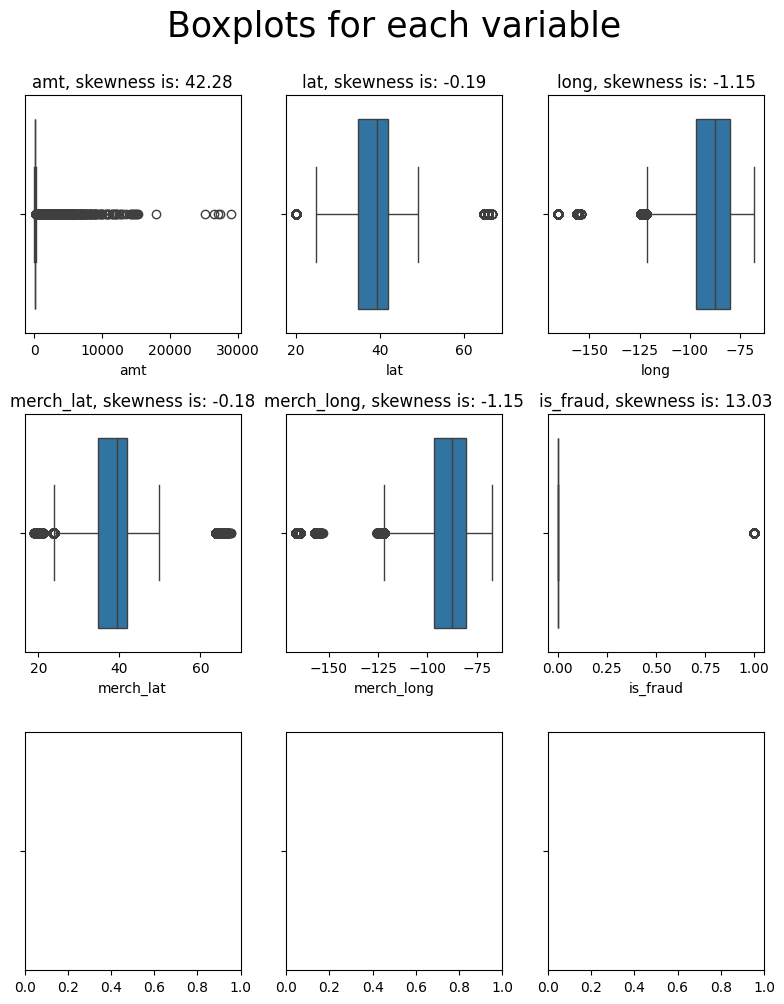

In [14]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(8,10))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=data, columns_list=data.select_dtypes(np.number), rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [90]:
from collections import Counter

In [104]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [105]:
Outliers_IQR = IQR_method(data,1,data.select_dtypes(np.number))

# dropping outliers
df_out = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 7506


In [197]:
print('Genuine:', round(data['is_fraud'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds:', round(data['is_fraud'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


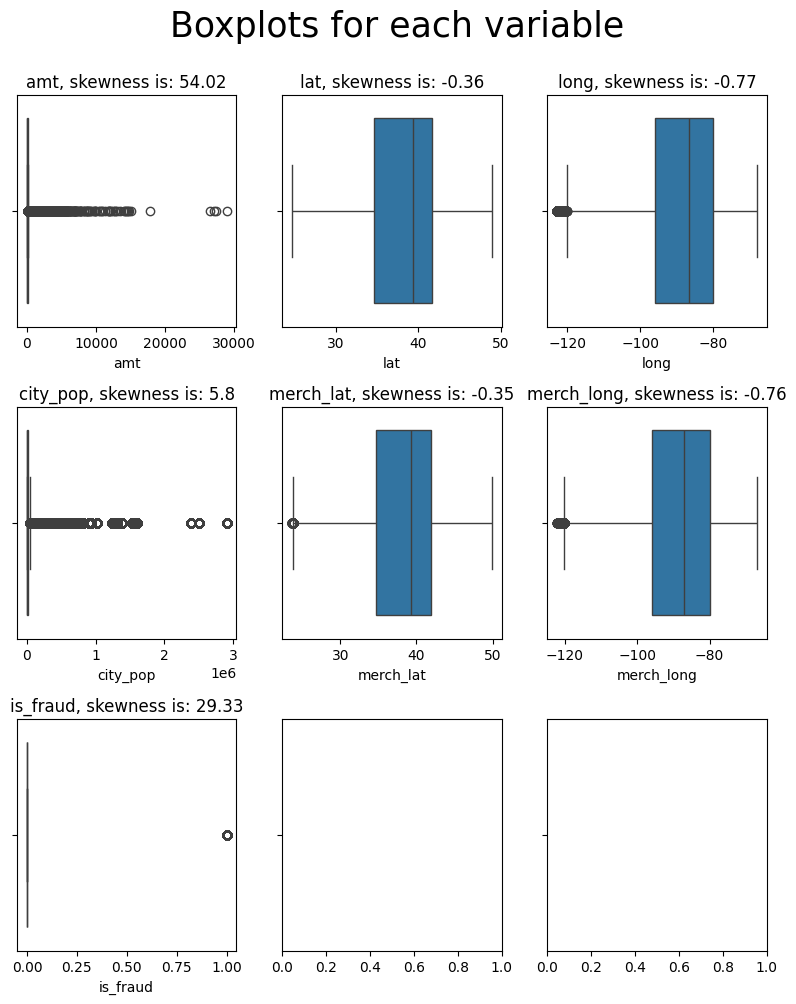

In [107]:
boxplots_custom(dataset=df_out, columns_list=data.select_dtypes(np.number), rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

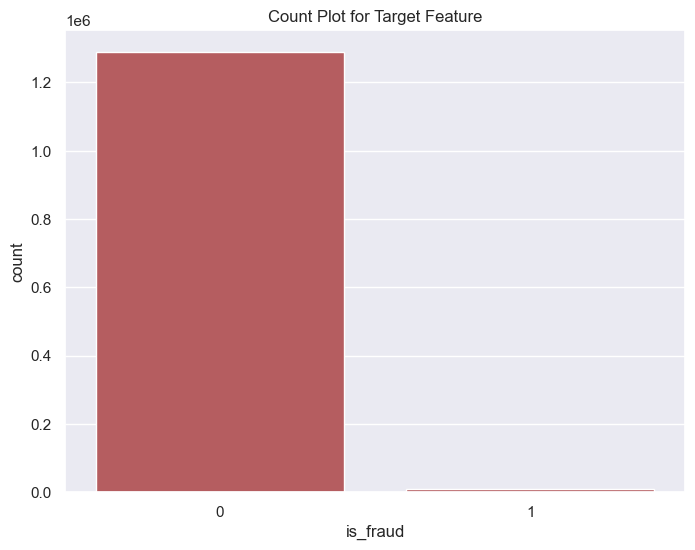

In [56]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data, color= 'r')
plt.title('Count Plot for Target Feature')
plt.show()

# Encoding and balancing techniques for data 

In [198]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [199]:
categorical_cols = ['gender', 'state', 'category']

# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep non-categorical columns unchanged
)

# Create a pipeline with the ColumnTransformer
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
X_encoded = pipeline.fit_transform(data[categorical_cols])

columns = pipeline.named_steps['preprocessor'].get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns = columns)

# Display the resulting DataFrame
print(df_encoded)

         cat__gender_F  cat__gender_M  cat__state_AK  cat__state_AL  \
0                  1.0            0.0            0.0            0.0   
1                  1.0            0.0            0.0            0.0   
2                  0.0            1.0            0.0            0.0   
3                  0.0            1.0            0.0            0.0   
4                  0.0            1.0            0.0            0.0   
...                ...            ...            ...            ...   
1296670            0.0            1.0            0.0            0.0   
1296671            0.0            1.0            0.0            0.0   
1296672            0.0            1.0            0.0            0.0   
1296673            0.0            1.0            0.0            0.0   
1296674            0.0            1.0            0.0            0.0   

         cat__state_AR  cat__state_AZ  cat__state_CA  cat__state_CO  \
0                  0.0            0.0            0.0            0.0   
1    

In [200]:
df_encoded

,cat__gender_F,cat__gender_M,cat__state_AK,cat__state_AL,cat__state_AR,cat__state_AZ,cat__state_CA,cat__state_CO,cat__state_CT,cat__state_DC,...,cat__category_grocery_pos,cat__category_health_fitness,cat__category_home,cat__category_kids_pets,cat__category_misc_net,cat__category_misc_pos,cat__category_personal_care,cat__category_shopping_net,cat__category_shopping_pos,cat__category_travel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296672,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296673,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
final = pd.concat([data, df_encoded], axis=1)

In [203]:
final.drop(columns=['category', 'gender', 'state', 'dob', 'job'], axis=1, inplace=True)

In [205]:
final.to_csv('/final_data.csv')

# Train models usin undersmapling method 

In [307]:
from sklearn.utils import resample

In [308]:
majority_class = final[data['is_fraud'] == 0]
minority_class = final[data['is_fraud'] == 1]

# Downsample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with the original minority class
df_downsampled = pd.concat([majority_downsampled, minority_class])

# Shuffle the dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [309]:
df_downsampled

,amt,lat,long,merch_lat,merch_long,is_fraud,cat__gender_F,cat__gender_M,cat__state_AK,cat__state_AL,...,cat__category_grocery_pos,cat__category_health_fitness,cat__category_home,cat__category_kids_pets,cat__category_misc_net,cat__category_misc_pos,cat__category_personal_care,cat__category_shopping_net,cat__category_shopping_pos,cat__category_travel
0,10.14,31.4841,-97.9903,31.451097,-97.303447,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87.96,40.1334,-75.4536,40.812810,-75.959901,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,929.06,33.9568,-81.1405,34.561499,-81.943123,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1051.89,38.0649,-99.2374,37.241060,-98.708210,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,20.09,34.3424,-80.5000,34.346041,-80.042299,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,127.56,36.7154,-89.6287,36.352084,-88.920424,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15008,1083.80,42.2203,-83.3583,41.335555,-83.320286,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15009,113.59,41.5205,-80.0573,41.743352,-80.367570,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15010,78.61,26.3771,-81.7334,25.439671,-80.912177,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [310]:
X = df_downsampled.drop(['is_fraud'], axis = 1)
y = df_downsampled['is_fraud']
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X, y, test_size=0.2, random_state=42)

In [311]:
from sklearn.preprocessing import StandardScaler
# Define the numerical columns (assuming all features are numerical in this example)
numerical_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long']

# Create a ColumnTransformer to scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Keep non-numerical columns unchanged
)

# Create a pipeline with the ColumnTransformer and a classifier (Random Forest in this example)
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the training data using the pipeline
X_train_scaled = pipeline.fit_transform(X_train_down)

# Transform the test data using the fitted pipeline
X_test_scaled = pipeline.transform(X_test_down)

In [312]:
X_train_down = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_down = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [325]:
clf3 = MyClassifier()

# Random forest down sampling

In [ ]:
model_rf_1 = clf3.train_random_forest(X_train_down, y_train_down)
predictions_rf_down = clf3.predict_random_forest(X_test)

In [322]:
print(classification_report(y_test, predictions_rf_down))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88    257815
           1       0.02      0.79      0.04      1520

    accuracy                           0.78    259335
   macro avg       0.51      0.79      0.46    259335
weighted avg       0.99      0.78      0.87    259335



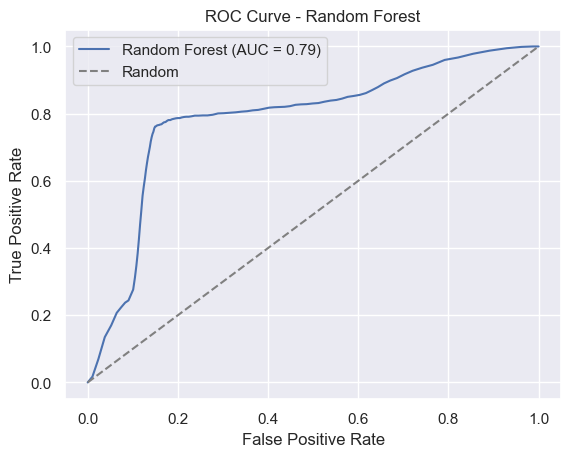

0.7878799861079496

In [316]:
clf3.calculate_auc_curve(X_test, y_test, 'Random Forest') 

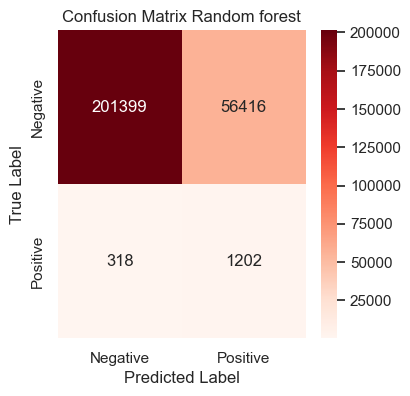

In [317]:
plot_confusion(clf3.calculate_confusion_matrix(y_test, predictions_rf_down), 'Random forest')

# KNN down sampling 

In [285]:
clf3.train_knn(X_train_down, y_train_down, n_neighbors=3)
predictions_knn_down = clf3.predict_knn(X_test)

In [286]:
print(classification_report(y_test, predictions_knn_down))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85    257815
           1       0.01      0.59      0.03      1520

    accuracy                           0.73    259335
   macro avg       0.50      0.66      0.44    259335
weighted avg       0.99      0.73      0.84    259335



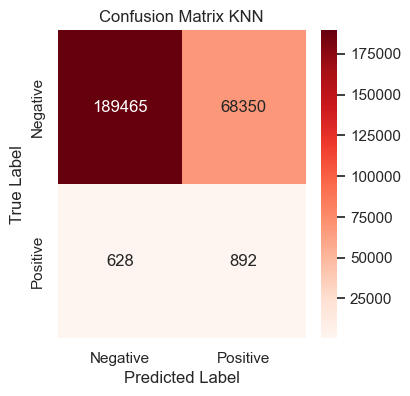

In [287]:
plot_confusion(clf3.calculate_confusion_matrix(y_test, predictions_knn_down), 'KNN')

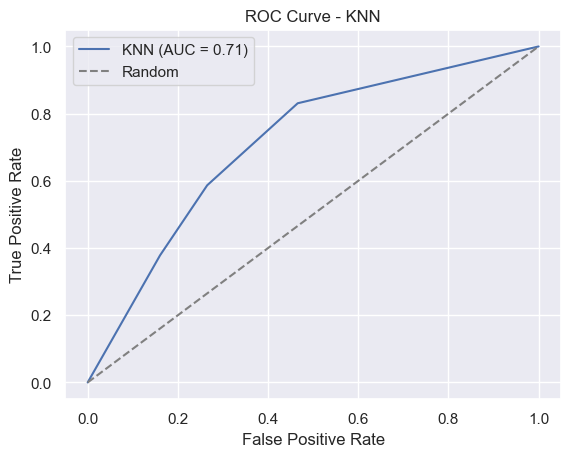

0.7121417399971623

In [288]:
clf3.calculate_auc_curve(X_test, y_test, 'KNN')

# Logistic regression 

In [289]:
clf3.train_logistic_regression(X_train_down, y_train_down)
predictions_lr_down = clf3.predict_logistic_regression(X_test)

C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [290]:
print(classification_report(y_test, predictions_lr_down))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54    257815
           1       0.01      0.98      0.02      1520

    accuracy                           0.37    259335
   macro avg       0.50      0.68      0.28    259335
weighted avg       0.99      0.37      0.54    259335



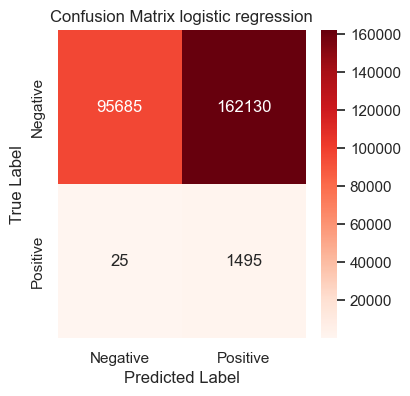

In [291]:
plot_confusion(clf3.calculate_confusion_matrix(y_test, predictions_lr_down), 'logistic regression')

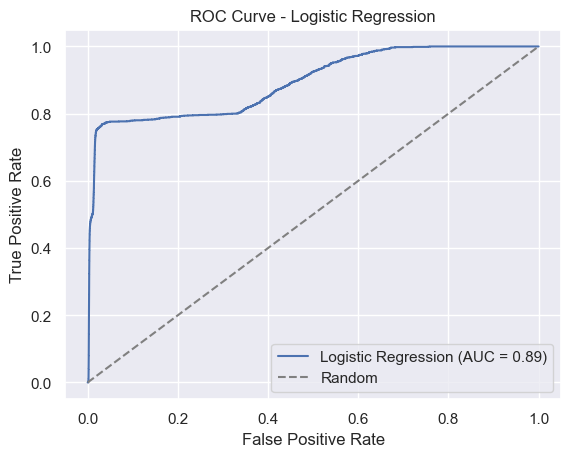

0.894057869422893

In [292]:
clf3.calculate_auc_curve(X_test, y_test, 'Logistic Regression')

# Naive bayes undersampling

In [293]:
clf3.train_naive_bayes(X_train_down, y_train_down)
predictions_nv_down = clf3.predict_naive_bayes(X_test)

In [294]:
print(classification_report(y_test, predictions_nv_down))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    257815
           1       0.02      0.74      0.04      1520

    accuracy                           0.81    259335
   macro avg       0.51      0.78      0.47    259335
weighted avg       0.99      0.81      0.89    259335



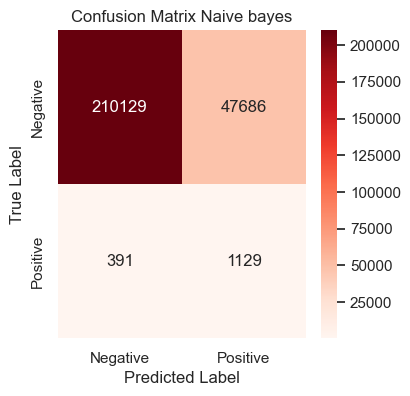

In [295]:
plot_confusion(clf3.calculate_confusion_matrix(y_test, predictions_nv_down), 'Naive bayes')

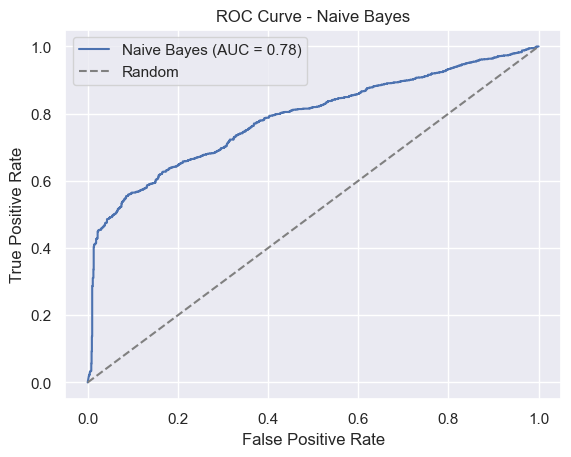

0.784670386700141

In [296]:
clf3.calculate_auc_curve(X_test_down, y_test_down, 'Naive Bayes')

## decision Tree

In [301]:
clf3.train_decision_tree(X_train_down, y_train_down)
predictions_dt_down = clf3.predict_decision_tree(X_test)

In [302]:
print(classification_report(y_test, predictions_dt_down))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83    257815
           1       0.01      0.29      0.01      1520

    accuracy                           0.71    259335
   macro avg       0.50      0.50      0.42    259335
weighted avg       0.99      0.71      0.82    259335



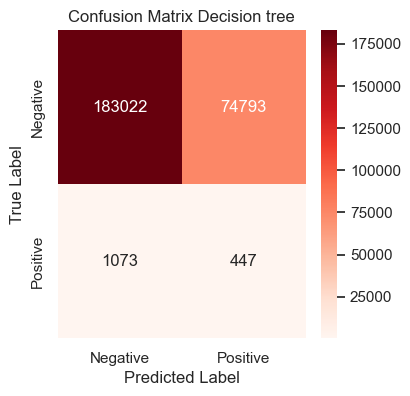

In [303]:
plot_confusion(clf3.calculate_confusion_matrix(y_test, predictions_dt_down), 'Decision tree')

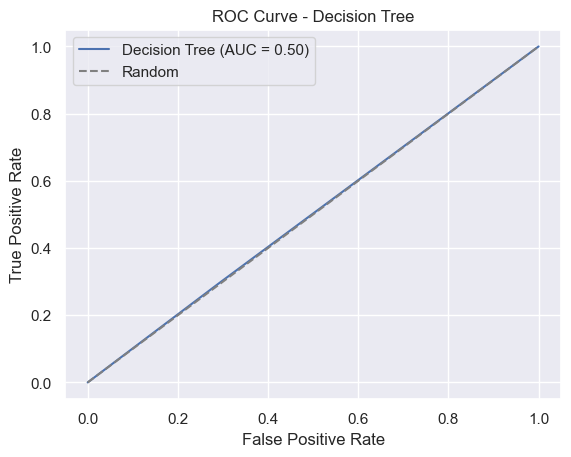

0.5019877893369072

In [304]:
clf3.calculate_auc_curve(X_test , y_test, 'Decision Tree')

# oversampling using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

print("Class distribution before SMOTE:")
print(np.bincount(y_train))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# After SMOTE
print("\nClass distribution after SMOTE:")
print(np.bincount(y_train_resampled))

Class distribution before SMOTE:
[1031354    5986]

Class distribution after SMOTE:
[1031354 1031354]


# Logistic regression for SMOTE 

In [71]:
clf4 = MyClassifier()

In [72]:
# logestic regression 
clf4.train_logistic_regression(X_train_resampled, y_train_resampled)
predictions_lr_SMOTE = clf4.predict_logistic_regression(X_test)

C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
print(classification_report(y_test, predictions_lr_SMOTE))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    257815
           1       0.03      0.77      0.07      1520

    accuracy                           0.87    259335
   macro avg       0.52      0.82      0.50    259335
weighted avg       0.99      0.87      0.93    259335



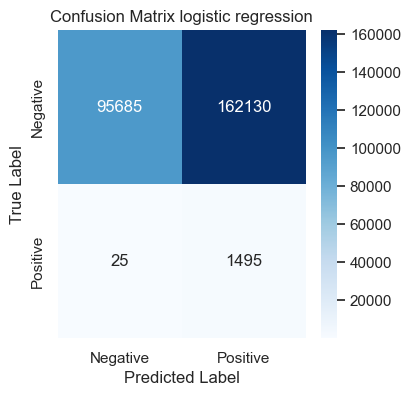

In [336]:
plot_confusion(clf4.calculate_confusion_matrix(y_test, predictions_lr_down), 'logistic regression')

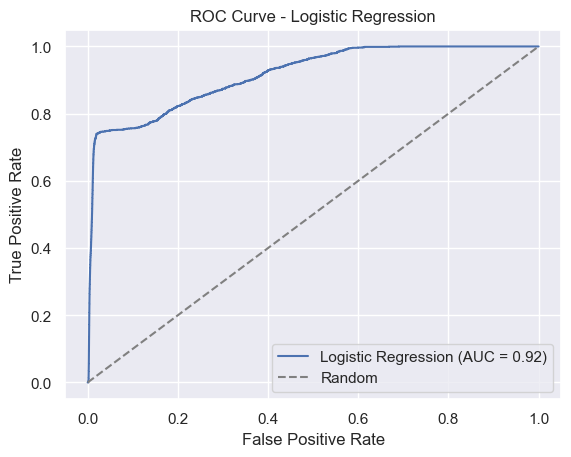

0.9153024149303304

In [75]:
clf4.calculate_auc_curve(X_test, y_test, 'Logistic Regression')

# save model 

In [ ]:
import joblib

In [88]:
# Save the trained model to a file
model_filename = 'logistic_regression_model.joblib'
joblib.dump(clf4.logistic_regression, model_filename)
print(f'Trained model saved to {model_filename}')

Trained model saved to logistic_regression_model.joblib


# Random forrest regression for SMOTE 

In [77]:
clf4.train_random_forest(X_train_resampled, y_train_resampled)
predictions_rf_SMOTE = clf4.predict_random_forest(X_test)

In [78]:
print(classification_report(y_test, predictions_rf_SMOTE))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.67      0.75      0.71      1520

    accuracy                           1.00    259335
   macro avg       0.83      0.87      0.85    259335
weighted avg       1.00      1.00      1.00    259335



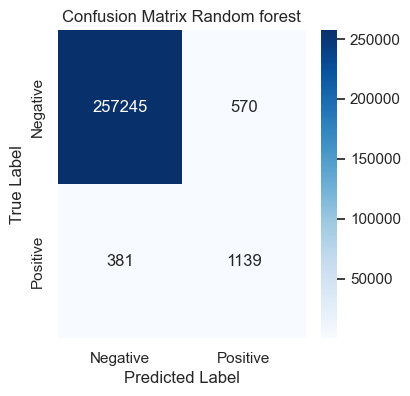

In [337]:
plot_confusion(clf4.calculate_confusion_matrix(y_test, predictions_rf_SMOTE), 'Random forest')

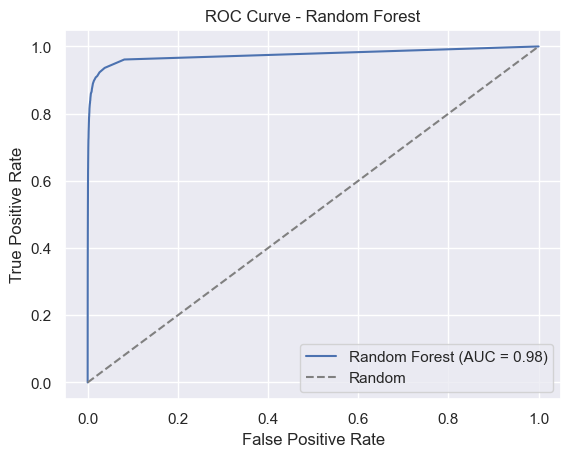

0.9754362407458633

In [80]:
clf4.calculate_auc_curve(X_test, y_test, 'Random Forest')

## save model 

In [ ]:
# Save the trained model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(clf4.random_forest_classifier, model_filename)
print(f'Trained model saved to {model_filename}')

Trained model saved to random_forest_model.joblib


# K-NN with SMOTE 

In [89]:
clf4.train_knn(X_train_resampled, y_train_resampled, n_neighbors=3)
predictions_knn_SMOTE = clf4.predict_knn(X_test)

In [90]:
print(classification_report(y_test, predictions_knn_SMOTE))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257815
           1       0.41      0.76      0.54      1520

    accuracy                           0.99    259335
   macro avg       0.71      0.88      0.77    259335
weighted avg       1.00      0.99      0.99    259335



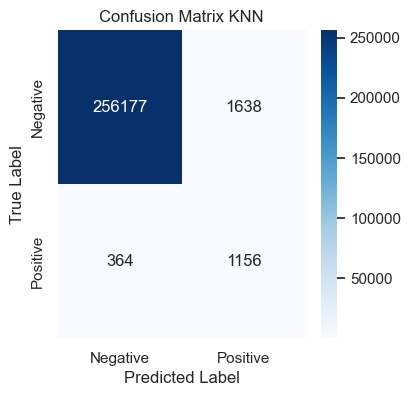

In [338]:
plot_confusion(clf4.calculate_confusion_matrix(y_test, predictions_knn_SMOTE), 'KNN')

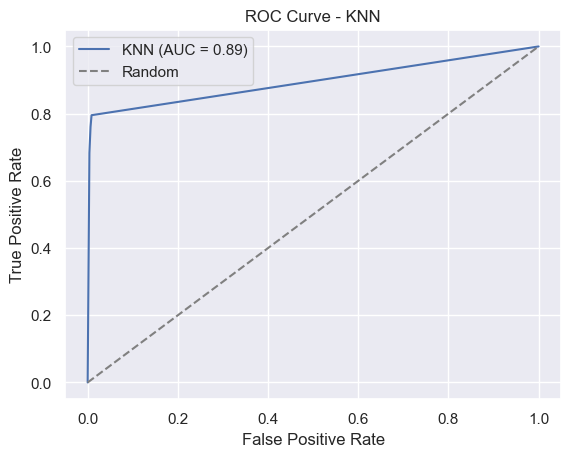

0.8948501539251421

In [92]:
clf4.calculate_auc_curve(X_test, y_test, 'KNN')

In [104]:
# Save the trained model to a file
model_filename = 'knn_model.joblib'
joblib.dump(clf4.knn_classifier, model_filename)
print(f'Trained model saved to {model_filename}')

Trained model saved to knn_model.joblib


# Decision Tree

In [98]:
clf4.train_decision_tree(X_train_resampled, y_train_resampled)
predictions_dt_SMOTE = clf4.predict_decision_tree(X_test)

In [99]:
print(classification_report(y_test, predictions_dt_SMOTE))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.53      0.74      0.62      1520

    accuracy                           0.99    259335
   macro avg       0.77      0.87      0.81    259335
weighted avg       1.00      0.99      1.00    259335



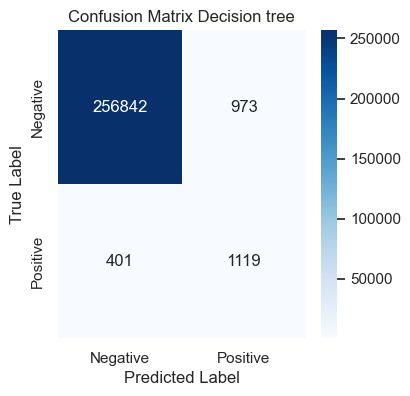

In [339]:
plot_confusion(clf4.calculate_confusion_matrix(y_test, predictions_dt_SMOTE), 'Decision tree')

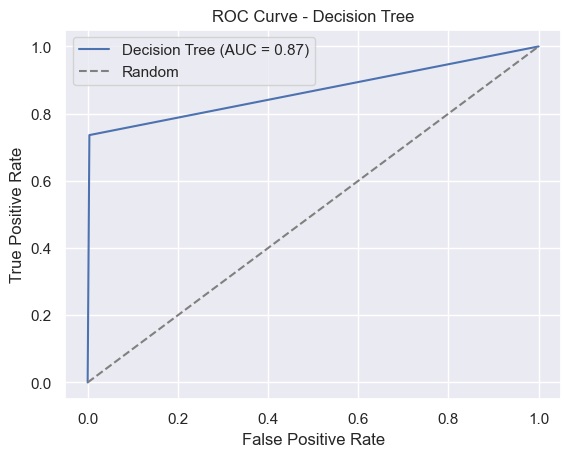

0.8662050932584258

In [101]:
clf4.calculate_auc_curve(X_test, y_test, 'Decision Tree')

In [103]:
# Save the trained model to a file
model_filename = 'decision_tree_model.joblib'
joblib.dump(clf4.decision_tree_classifier, model_filename)
print(f'Trained model saved to {model_filename}')

Trained model saved to decision_tree_model.joblib


## Naive bayes

In [105]:
clf4.train_naive_bayes(X_train_resampled, y_train_resampled)
predictions_nv_SMOTE = clf4.predict_naive_bayes(X_test)

In [106]:
print(classification_report(y_test, predictions_nv_SMOTE))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    257815
           1       0.02      0.66      0.04      1520

    accuracy                           0.79    259335
   macro avg       0.51      0.73      0.46    259335
weighted avg       0.99      0.79      0.88    259335



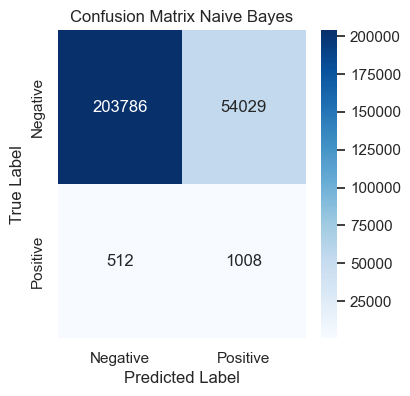

In [340]:
plot_confusion(clf4.calculate_confusion_matrix(y_test, predictions_nv_SMOTE), 'Naive Bayes')

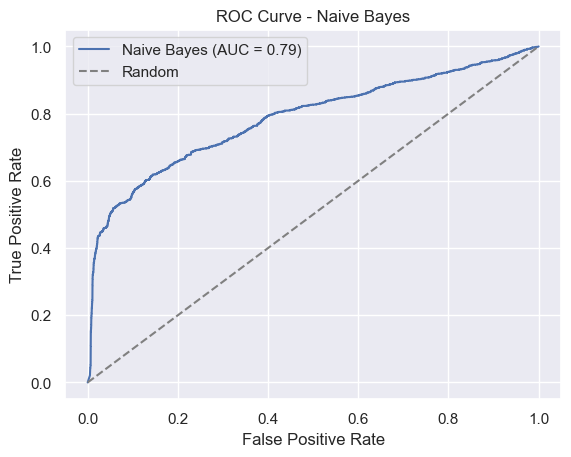

0.7860884296369184

In [112]:
clf4.calculate_auc_curve(X_test, y_test, 'Naive Bayes')

In [109]:
# Save the trained model to a file
model_filename = 'naive_bayes_model.joblib'
joblib.dump(clf4.naive_bayes_classifier, model_filename)
print(f'Trained model saved to {model_filename}')

Trained model saved to naive_bayes_model.joblib


## Model pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer([
 ('cat', OneHotEncoder(), categorical_cols), 
 ('num', StandardScaler(), numerical_cols)
 ])

Over = SMOTE()
model = RandomForestClassifier(n_estimators=120, criterion='log_loss')

steps = [('preprocessor', preprocessor), ('Over', Over), ('model', model)]
learning_pipeline = Pipeline(steps = steps)